In [109]:
# 数据一
import pandas as pd
df = pd.read_csv('ndm_transaction_list_all_20230705.csv')
# df_transaction["bond_cd"]

/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_65690/3139759228.py:3: DtypeWarning: Columns (69,83,110,121,122,123,124,125,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ndm_transaction_list_all_20230705.csv')


In [110]:
# 计算每个 bond 的均值和方差，并计算偏离均值1%以上的条目数量
def calculate_mean_and_std(group):
    mean = group['net_prc'].mean()
    std = group['net_prc'].std()
    deviation_count = (abs(group['net_prc'] - mean) / mean > 0.01).sum()
    return pd.Series({'mean': mean, 'std': std, 'deviation_count': deviation_count})

# 按 bond_cd 分组并计算统计量
stats = df.groupby('bond_cd').apply(calculate_mean_and_std).reset_index()

# 打印包含均值、方差和偏离数量的 DataFrame
print("包含均值、方差和偏离数量的数据框：")
print(stats)

# 打印偏离均值1%以上的条目数量
print("\n偏离均值1%以上的条目数量：")
print(stats[['bond_cd', 'deviation_count']])


包含均值、方差和偏离数量的数据框：
        bond_cd        mean       std  deviation_count
0        101908  100.700000       NaN              0.0
1        101962  101.017300       NaN              0.0
2        101963  101.017300       NaN              0.0
3        104505  104.101767  0.009995              0.0
4        104675  101.344800       NaN              0.0
...         ...         ...       ...              ...
1847  242380002   97.670000       NaN              0.0
1848  242380008   99.767114  0.031224              0.0
1849  272380002  101.784200       NaN              0.0
1850  272380003  101.089600  0.000000              0.0
1851  272380007  100.083600       NaN              0.0

[1852 rows x 4 columns]

偏离均值1%以上的条目数量：
        bond_cd  deviation_count
0        101908              0.0
1        101962              0.0
2        101963              0.0
3        104505              0.0
4        104675              0.0
...         ...              ...
1847  242380002              0.0
1848  242380008  

In [104]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('ndm_transaction_list_all_20230705.csv')

# 计算每个 bond 的指标
def calculate_indicators(group):
    mean = group['net_prc'].mean()
    std = group['net_prc'].std()
    max_deviation = (abs(group['net_prc'] - mean) / mean).max()
    deviation_std = (abs(group['net_prc'] - mean) / mean).std()
    deviation_count = (abs(group['net_prc'] - mean) / mean > 0.01).sum()
    total_volume = group['nmnl_vol'].sum()
    trade_count = group['nmnl_vol'].count()
    volume_mean = group['nmnl_vol'].mean()
    volume_std = group['nmnl_vol'].std()
    volume_cv = volume_std / volume_mean if volume_mean != 0 else 0
    Q1 = group['net_prc'].quantile(0.25)
    Q3 = group['net_prc'].quantile(0.75)
    IQR = Q3 - Q1

    return pd.Series({
        'mean': mean, 
        'std': std, 
        'max_deviation': max_deviation, 
        'deviation_std': deviation_std, 
        'deviation_count': deviation_count,
        'total_volume': total_volume,
        'trade_count': trade_count,
        'volume_mean': volume_mean,
        'volume_std': volume_std,
        'volume_cv': volume_cv,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    })

# 按 bond_cd 分组并计算统计量
stats = df.groupby('bond_cd').apply(calculate_indicators).reset_index()

# 打印包含所有指标的 DataFrame
print("包含所有指标的数据框：")
print(stats)

# 根据 `deviation_count` 和 `max_deviation` 列进行降序排序
sorted_df = stats.sort_values(by=['max_deviation', 'deviation_count', 'total_volume', 'trade_count'], ascending=[False, False, False, False])

# 打印排序后的 DataFrame
print(sorted_df)


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_65690/1254326984.py:4: DtypeWarning: Columns (69,83,110,121,122,123,124,125,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ndm_transaction_list_all_20230705.csv')


包含所有指标的数据框：
        bond_cd        mean       std  max_deviation  deviation_std  \
0        101908  100.700000       NaN       0.000000            NaN   
1        101962  101.017300       NaN       0.000000            NaN   
2        101963  101.017300       NaN       0.000000            NaN   
3        104505  104.101767  0.009995       0.000105       0.000043   
4        104675  101.344800       NaN       0.000000            NaN   
...         ...         ...       ...            ...            ...   
1847  242380002   97.670000       NaN       0.000000            NaN   
1848  242380008   99.767114  0.031224       0.000506       0.000197   
1849  272380002  101.784200       NaN       0.000000            NaN   
1850  272380003  101.089600  0.000000       0.000000       0.000000   
1851  272380007  100.083600       NaN       0.000000            NaN   

      deviation_count  total_volume  trade_count   volume_mean    volume_std  \
0                 0.0    30000000.0          1.0  3.000

In [107]:
stats.sort_values(by=['max_deviation'], ascending=[False])

,bond_cd,mean,std,max_deviation,deviation_std,deviation_count,total_volume,trade_count,volume_mean,volume_std,volume_cv,Q1,Q3,IQR
254,230004,101.650521,0.102731,0.015846,0.000850,1.0,1.403000e+10,372.0,3.771505e+07,3.484884e+07,0.924003,101.602100,101.70440,0.102300
268,230205,101.531100,0.066393,0.015563,0.000463,1.0,5.632000e+10,1699.0,3.314891e+07,2.950950e+07,0.890210,101.494200,101.57850,0.084300
259,230009,103.411328,0.115498,0.005983,0.000583,0.0,1.017165e+10,314.0,3.239379e+07,2.455381e+07,0.757979,103.320500,103.52050,0.200000
545,2228041,101.252333,0.217770,0.004323,0.001461,0.0,1.500000e+08,6.0,2.500000e+07,1.760682e+07,0.704273,101.173200,101.20095,0.027750
1623,112305076,97.551375,0.243663,0.003745,0.001250,0.0,5.500000e+08,4.0,1.375000e+08,1.108678e+08,0.806311,97.545625,97.67510,0.129475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,32100449,101.342500,NaN,0.000000,NaN,0.0,2.000000e+07,1.0,2.000000e+07,NaN,NaN,101.342500,101.34250,0.000000
846,32100448,101.004100,0.000000,0.000000,0.000000,0.0,1.000000e+07,5.0,2.000000e+06,0.000000e+00,0.000000,101.004100,101.00410,0.000000
844,32100438,101.177200,0.000000,0.000000,0.000000,0.0,3.000000e+07,2.0,1.500000e+07,7.071068e+06,0.471405,101.177200,101.17720,0.000000
843,32100430,101.110400,NaN,0.000000,NaN,0.0,3.000000e+07,1.0,3.000000e+07,NaN,NaN,101.110400,101.11040,0.000000


In [105]:
sorted_df = stats.sort_values(by=['max_deviation', 'deviation_count', 'total_volume', 'trade_count'], ascending=[False, False, False, False])

,bond_cd,mean,std,max_deviation,deviation_std,deviation_count,total_volume,trade_count,volume_mean,volume_std,volume_cv,Q1,Q3,IQR
0,101908,100.700000,NaN,0.000000,NaN,0.0,30000000.0,1.0,3.000000e+07,NaN,NaN,100.7000,100.7000,0.0000
1,101962,101.017300,NaN,0.000000,NaN,0.0,100000000.0,1.0,1.000000e+08,NaN,NaN,101.0173,101.0173,0.0000
2,101963,101.017300,NaN,0.000000,NaN,0.0,30000000.0,1.0,3.000000e+07,NaN,NaN,101.0173,101.0173,0.0000
3,104505,104.101767,0.009995,0.000105,0.000043,0.0,180000000.0,3.0,6.000000e+07,0.000000e+00,0.000000,104.0963,104.1061,0.0098
4,104675,101.344800,NaN,0.000000,NaN,0.0,100000000.0,1.0,1.000000e+08,NaN,NaN,101.3448,101.3448,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,242380002,97.670000,NaN,0.000000,NaN,0.0,120000000.0,1.0,1.200000e+08,NaN,NaN,97.6700,97.6700,0.0000
1848,242380008,99.767114,0.031224,0.000506,0.000197,0.0,240000000.0,7.0,3.428571e+07,1.902379e+07,0.554861,99.7502,99.7757,0.0255
1849,272380002,101.784200,NaN,0.000000,NaN,0.0,10000000.0,1.0,1.000000e+07,NaN,NaN,101.7842,101.7842,0.0000
1850,272380003,101.089600,0.000000,0.000000,0.000000,0.0,30000000.0,2.0,1.500000e+07,1.131371e+07,0.754247,101.0896,101.0896,0.0000


In [102]:
import pandas as pd

# 示例数据
data = {
    'deviation_count': [10, 20, 30, 25],
    'max_deviation': [0.05, 0.1, 0.02, 0.03],
    'total_volume': [1000, 2000, 1500, 3000],
    'trade_count': [15, 25, 10, 20]
}
df = pd.DataFrame(data)

# 根据 `deviation_count` 和 `max_deviation` 列进行降序排序
sorted_df = df.sort_values(by=['deviation_count', 'max_deviation', 'total_volume', 'trade_count'], ascending=[False, False, False, False])

# 打印排序后的 DataFrame
print(sorted_df)


   deviation_count  max_deviation  total_volume  trade_count
2               30           0.02          1500           10
3               25           0.03          3000           20
1               20           0.10          2000           25
0               10           0.05          1000           15


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_65690/2231996976.py:5: DtypeWarning: Columns (69,83,110,121,122,123,124,125,128) have mixed types. Specify dtype option on import or set low_memory=False.
  ndm_transaction_data = pd.read_csv('ndm_transaction_list_all_20230705.csv')
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_65690/2231996976.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndm_transaction_filtered_data['timeStamp'] = pd.to_datetime(ndm_transaction_filtered_data['dl_tm'])


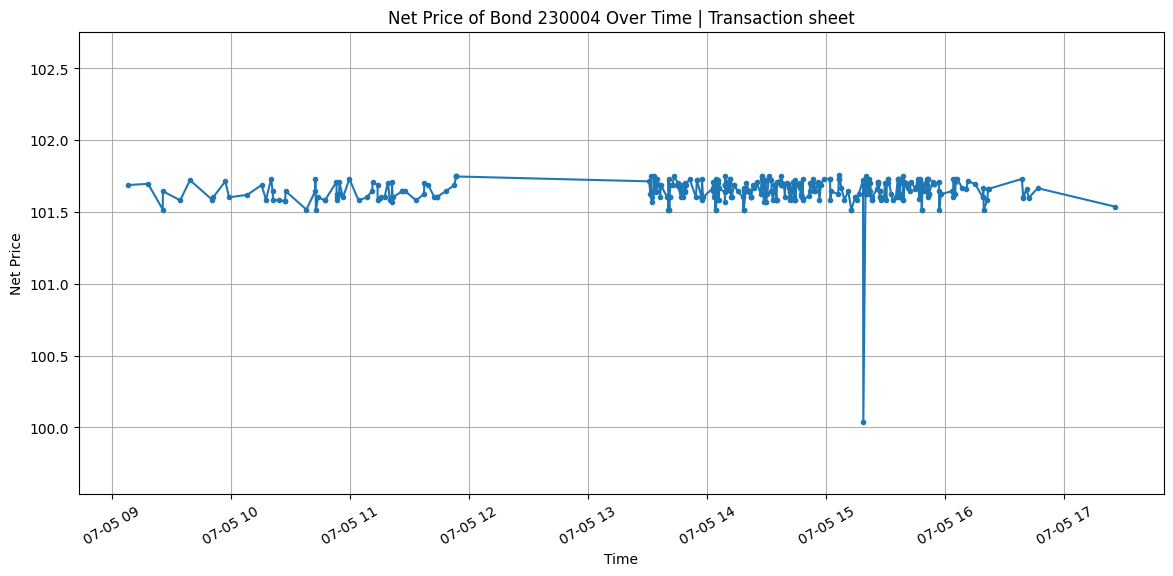

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件并筛选特定债券数据
ndm_transaction_data = pd.read_csv('ndm_transaction_list_all_20230705.csv')
ndm_transaction_filtered_data = ndm_transaction_data[ndm_transaction_data['bond_cd'] == 230004]
# 转换时间戳格式
ndm_transaction_filtered_data['timeStamp'] = pd.to_datetime(ndm_transaction_filtered_data['dl_tm'])

# 排序
ndm_transaction_sorted_data = ndm_transaction_filtered_data.sort_values(by='timeStamp', ascending=True)

# 创建绘图
plt.figure(figsize=(14, 6))
plt.plot(ndm_transaction_sorted_data['timeStamp'], ndm_transaction_sorted_data['net_prc'], marker='o', markersize=3)
plt.xlabel('Time')
plt.ylabel('Net Price')
plt.title('Net Price of Bond 230004 Over Time | Transaction sheet')
plt.xticks(rotation=30)
plt.grid(True)

# 调整 y 轴范围
plt.ylim(min(ndm_transaction_sorted_data['net_prc']) - 0.5, max(ndm_transaction_sorted_data['net_prc']) + 1)
plt.show()
